### Packages

In [22]:
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff

# load image and convert to and from NumPy array
import PIL
from PIL import Image
from numpy import asarray

import numpy as np
import pandas as pd
import os
import glob
import ntpath
import h5py
import cv2
import imageio as iio
import scipy
from scipy import ndimage

### Reading images and Patchigng 

In [2]:
path = os.getcwd()
tif_files = glob.glob(os.path.join("C:/Users/adria/OneDrive/Desktop", "*.tif"))

for i in tif_files:
    
    large_mask_stack = tiff.imread(i)
    
    
    for msk in range(large_mask_stack.shape[0]):
     
        large_mask = large_mask_stack[msk]
    
        patches_mask = patchify(large_mask, (64, 64), step=256)  #Step=256 for 256 patches means no overlap
    

        for i in range(patches_mask.shape[0]):
            for j in range(patches_mask.shape[1]):
            
                single_patch_mask = patches_mask[i,j,:,:]
                tiff.imwrite('C:/Users/adria/OneDrive/Desktop/dataset2/' + 'mask_' + str(msk) + '_' + str(i)+str(j)+ ".tif", single_patch_mask)
                single_patch_mask = single_patch_mask / 255.

ValueError: `window_shape` is incompatible with `arr_in.shape`

In [ ]:

# Importing Image class from PIL module
from PIL import Image
 
# Opens a image in RGB mode
im = Image.open("C:/Users/adria/OneDrive/Desktop/15_h.tif")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
left = 155
top = 65
right = 360
bottom = 270
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.show()

### Showing

C:\Users\adria\AppData\Local\Temp\ipykernel_20236\1894560681.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


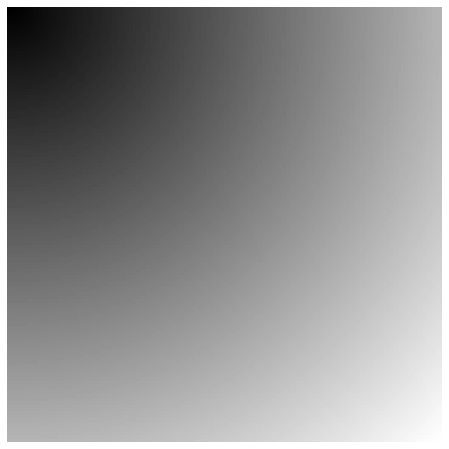

In [16]:
gen_imgs = DT
# gen_imgs = 0.5*gen_imgs + 0.5

fig,axs = plt.subplots(1,figsize=(8,8),sharey=True,sharex=True)

# cnt=0
# for i in range(4):
#     for j in range(4):
#         axs[i, j].imshow(gen_imgs[cnt,:,:,0],cmap='gray')
#         axs[i, j].axis('off')
#         cnt+=1
axs.imshow(gen_imgs,cmap='gray')
axs.axis('off')
fig.show()

### cropping

In [56]:
img = im
 
 
left = 400
top = 400
right = 460
bottom = 460
 
  
img_res = img.crop((left, top, right, bottom)) 
 
 
img_res.show() 

AttributeError: 'numpy.ndarray' object has no attribute 'crop'

### Resizing

In [9]:
foo = x
# I downsize the image with an ANTIALIAS filter (gives the highest quality)
foo = foo.resize((128,128),Image.ANTIALIAS)
foo.save("C:/Users/adria/OneDrive/Desktop/1.tiff",quality=95)
 # The saved downsized image size is 24.8kb
foo.save("C:/Users/adria/OneDrive/Desktop/2.tiff",optimize=True,quality=95)
 # The saved downsized image size is 22.9kb

### Dialating / Erosion Trainset

In [20]:
path = os.getcwd()
tif_files = glob.glob(os.path.join("C:/Users/adria/OneDrive/Desktop", "*.tif"))

In [24]:
kernel = np.ones((3,3), np.uint8)

k=0
for z in tif_files:
    
    im = Image.open(z)
    im = asarray(im)
    m,n = im.shape
    avg = im.mean()
#     for i in range(m):
#         for j in range(n):
#             if im[i,j]>avg:
#                 im[i,j] = 255
#             else:
#                 im[i,j] = 0
    im[im>=avg]=255
    im[im<avg] = 0
    img_dilate = cv2.dilate(im, kernel, iterations=1)
    img_dilate = Image.fromarray(img_dilate).convert('1')
    img_dilate.save('C:/Users/adria/OneDrive/Desktop/' + 'mask_' + str(k)  + ".tif")
    k+=1


   

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'dilate'
> Overload resolution failed:
>  - src data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


### Dialating / Erosion Testset

In [74]:
path = os.getcwd()
tif_files = glob.glob(os.path.join("C:/Users/adria/OneDrive/Desktop/dataset2/test", "*.tif"))

In [75]:
kernel = np.ones((3,3), np.uint8)

k=0
for z in tif_files:
    
    im = Image.open(z)
    im = asarray(im)
    m,n = im.shape
    avg = im.mean()
#     for i in range(m):
#         for j in range(n):
#             if im[i,j]>avg:
#                 im[i,j] = 255
#             else:
#                 im[i,j] = 0
    im[im>=avg]=255
    im[im<avg] = 0
    img_dilate = cv2.dilate(im, kernel, iterations=1)
    img_dilate = Image.fromarray(img_dilate).convert('1')
    img_dilate.save('C:/Users/adria/OneDrive/Desktop/TopoGan/dataset2_dialated/test/' + 'mask_' + str(k)  + ".tif")
    k+=1


   